In [110]:
import pandas as pd
train = pd.read_csv('train_gbW7HTd.csv')
test = pd.read_csv('test_2AFBew7.csv')

test.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
dtype: object

In [2]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [3]:
#Step1: Get a list of categorical variables:

categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
print(categorical_variables)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [10]:
#Step2: Use the apply function in python to determine the number of unique values in each column
train[categorical_variables].apply(lambda x: len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

In [13]:
#Print the counts of each category:
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [16]:
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

In [17]:
train['Native.Country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [18]:
train['Native.Country'].value_counts()/train.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

In [19]:
train['Age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

# Multivariate Analysis

In [22]:
#Print the cross-tabulation
ct = pd.crosstab(train['Sex'], train['Income.Group'], margins=True)
print(ct)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


# Categorical - categorical

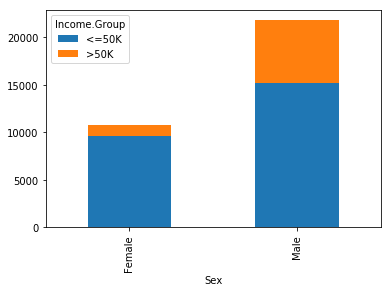

In [32]:
import matplotlib.pyplot as plt
ct.iloc[:-1,:-1].plot(kind='bar', stacked = True, grid=False)
plt.show()

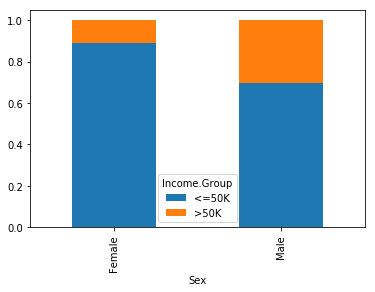

In [35]:
def percConvert(ser):
    return ser/float(ser[-1])

ct2 = ct.apply(percConvert, axis=1)
ct2.iloc[:-1,:-1].plot(kind='bar', stacked=True, grid=False)
plt.show()

# Continuous - continuous

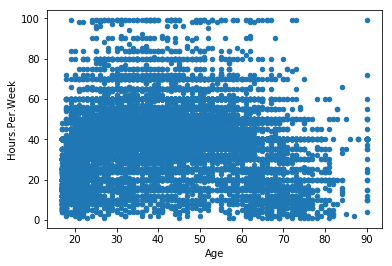

In [38]:
train.plot('Age', 'Hours.Per.Week', kind='scatter')
plt.show()

# Categorical - continuous

C:\Users\PNaF\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


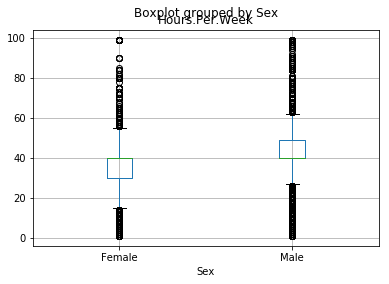

In [41]:
train.boxplot(column = 'Hours.Per.Week', by = 'Sex')
plt.show()

In [49]:
train.loc[train.Sex=='Male', 'Income.Group'].value_counts()/train.shape[0]

<=50K    0.464605
>50K     0.204601
Name: Income.Group, dtype: float64

# Missing value treatment

In [50]:
#Checking the missing values in training data:
train.apply(lambda x: sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [51]:
#Checking the missing values in testing data:
test.apply(lambda x: sum(x.isnull()))

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

# imputation

In [59]:
from scipy.stats import mode
mode(train.Occupation.dropna()).mode[0]

C:\Users\PNaF\Anaconda3\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Prof-specialty'

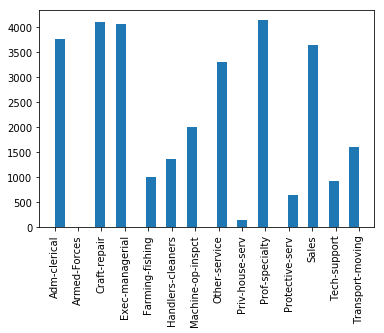

In [71]:
train.Occupation.hist(bins = 30, grid=False)
plt.xticks(rotation='vertical')
plt.show()

In [75]:
train.Occupation.value_counts()/train.shape[0]

Prof-specialty       0.127146
Craft-repair         0.125887
Exec-managerial      0.124873
Adm-clerical         0.115783
Sales                0.112097
Other-service        0.101195
Machine-op-inspct    0.061485
Transport-moving     0.049046
Handlers-cleaners    0.042075
Farming-fishing      0.030527
Tech-support         0.028500
Protective-serv      0.019932
Priv-house-serv      0.004576
Armed-Forces         0.000276
Name: Occupation, dtype: float64

In [76]:
mode(train.Workclass.dropna()).mode[0]

C:\Users\PNaF\Anaconda3\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Private'

In [77]:
var_to_impute = ['Workclass', 'Occupation', 'Native.Country']
for var in var_to_impute:
    train[var].fillna(mode(train[var].dropna()).mode[0], inplace=True)
    test[var].fillna(mode(test[var].dropna()).mode[0], inplace = True)
train.apply(lambda x: sum(x.isnull()))

C:\Users\PNaF\Anaconda3\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [79]:
test.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
dtype: int64

# Outliers

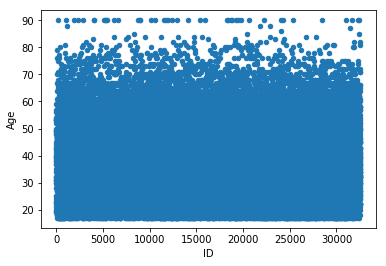

In [83]:
train.plot('ID', 'Age', kind='scatter')
plt.show()

In [84]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


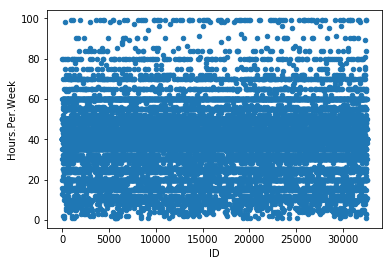

In [87]:
train.plot('ID', 'Hours.Per.Week', kind='scatter')
plt.show()

# Variable Transformation

In [88]:
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64

In [89]:
categories_to_combine = ['Never-worked', 'Without-pay', 'Federal-gov', 'Self-emp-inc', 'State-gov']
for cat in categories_to_combine:
    train['Workclass'].replace({cat:'Others'}, inplace = True)
    test['Workclass'].replace({cat:'Others'}, inplace = True)
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Others              0.104266
Self-emp-not-inc    0.078038
Local-gov           0.064279
Name: Workclass, dtype: float64

In [91]:
test['Workclass'].value_counts()/train.shape[0]

Private             0.373852
Others              0.053561
Self-emp-not-inc    0.040570
Local-gov           0.032032
Name: Workclass, dtype: float64

In [97]:
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
categorical_variables

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [117]:
for cat in categorical_variables:
    frq = train[cat].value_counts()/train.shape[0]
    categories_to_combine = frq.loc[frq.values<.05].index
    for com in categories_to_combine:
        train[cat].replace({com:'Others'}, inplace = True)
        test[cat].replace({com:'Others'}, inplace = True)
train[categorical_variables].apply(lambda x: len(x.unique()))

Workclass         5
Education         5
Marital.Status    4
Occupation        9
Relationship      5
Race              3
Sex               2
Native.Country    3
Income.Group      2
dtype: int64

In [115]:
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
categorical_variables_test = categorical_variables.drop('Income.Group')
categorical_variables_test

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country'],
      dtype='object')

In [118]:
test[categorical_variables_test].apply(lambda x: len(x.unique()))

Workclass         5
Education         5
Marital.Status    4
Occupation        9
Relationship      5
Race              3
Sex               2
Native.Country    3
dtype: int64

In [120]:
test['Native.Country'].unique()

array(['United-States', nan, 'Others'], dtype=object)

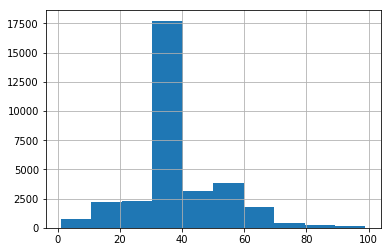

In [127]:
train['Hours.Per.Week'].hist()
plt.show()

# Step 1: Data Preprocessing

In [135]:
import pandas as pd
train = pd.read_csv('train_gbW7HTd.csv')
test = pd.read_csv('test_2AFBew7.csv')

#test.dtypes

from sklearn.preprocessing import LabelEncoder
categorical_variables_train = train.dtypes.loc[train.dtypes=='object'].index
categorical_variables_test = test.dtypes.loc[test.dtypes=='object'].index

In [136]:
train.apply(lambda x: sum(x.isnull())), test.apply(lambda x: sum(x.isnull()))

(ID                   0
 Age                  0
 Workclass         1836
 Education            0
 Marital.Status       0
 Occupation        1843
 Relationship         0
 Race                 0
 Sex                  0
 Hours.Per.Week       0
 Native.Country     583
 Income.Group         0
 dtype: int64, ID                  0
 Age                 0
 Workclass         963
 Education           0
 Marital.Status      0
 Occupation        966
 Relationship        0
 Race                0
 Sex                 0
 Hours.Per.Week      0
 Native.Country    274
 dtype: int64)

In [137]:
var_to_impute = ['Workclass', 'Occupation', 'Native.Country']
for var in var_to_impute:
    train[var].fillna(mode(train[var].dropna()).mode[0], inplace=True)
    test[var].fillna(mode(test[var].dropna()).mode[0], inplace = True)
train.apply(lambda x: sum(x.isnull())), test.apply(lambda x: sum(x.isnull()))

C:\Users\PNaF\Anaconda3\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


(ID                0
 Age               0
 Workclass         0
 Education         0
 Marital.Status    0
 Occupation        0
 Relationship      0
 Race              0
 Sex               0
 Hours.Per.Week    0
 Native.Country    0
 Income.Group      0
 dtype: int64, ID                0
 Age               0
 Workclass         0
 Education         0
 Marital.Status    0
 Occupation        0
 Relationship      0
 Race              0
 Sex               0
 Hours.Per.Week    0
 Native.Country    0
 dtype: int64)

In [138]:
#now we convert them using labelencoder:
le = LabelEncoder()
for var in categorical_variables_train:
    train[var] = le.fit_transform(train[var])
for var in categorical_variables_test:
    test[var] = le.fit_transform(test[var])
train.dtypes, test.dtypes

(ID                int64
 Age               int64
 Workclass         int64
 Education         int64
 Marital.Status    int64
 Occupation        int64
 Relationship      int64
 Race              int64
 Sex               int64
 Hours.Per.Week    int64
 Native.Country    int64
 Income.Group      int64
 dtype: object, ID                int64
 Age               int64
 Workclass         int64
 Education         int64
 Marital.Status    int64
 Occupation        int64
 Relationship      int64
 Race              int64
 Sex               int64
 Hours.Per.Week    int64
 Native.Country    int64
 dtype: object)

In [139]:
from sklearn.tree import DecisionTreeClassifier
dependent_variable = 'Income.Group'
independent_variable = [x for x in train.columns if x not in ['ID', dependent_variable]]
independent_variable

['Age',
 'Workclass',
 'Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Hours.Per.Week',
 'Native.Country']

In [140]:
model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 100, max_features = 'sqrt')
model.fit(train[independent_variable], train[dependent_variable])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [141]:
predictions_train = model.predict(train[independent_variable])
predictions_test = model.predict(test[independent_variable])

In [142]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(train[dependent_variable], predictions_train)

In [143]:
print('Train Accuracy: %f' % acc_train)

Train Accuracy: 0.823501


In [151]:
test['Income.Group']=predictions_test
test

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,32562,25,3,1,4,6,3,2,1,40,37,0
1,32563,38,3,11,2,4,0,4,1,50,37,1
2,32564,28,1,7,2,10,0,4,1,40,37,0
3,32565,44,3,15,2,6,0,2,1,40,37,1
4,32566,18,3,15,4,9,3,4,0,30,37,0
5,32567,34,3,0,4,7,1,4,1,30,37,0
6,32568,29,3,11,4,9,4,2,1,40,37,0
7,32569,63,5,14,2,9,0,4,1,32,37,1
8,32570,24,3,15,4,7,4,4,0,40,37,0
9,32571,55,3,5,2,2,0,4,1,10,37,0


In [166]:
submission = test[['ID','Income.Group']].copy()

In [171]:
submission = submission.set_index('ID')

In [179]:
submission['Income.Group'].replace({'<3':'<=50K', '>50Kaa':'>50K'}, inplace = True)
#submission

In [180]:
submission.to_csv('submission.csv')

In [181]:
acc_test = 0.8204041520791107
print('Test Accuracy: %f' % acc_test)

Test Accuracy: 0.820404
